# Project: Investigate a Dataset (exams.csv)

## Preliminary Wrangling
<br>
This document explores a dataset containing certain scores and attributes for 1000 students.

In [1]:
# import packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read the datatset file
df = pd.read_csv('exams.csv')

#overview data shape and info
print(df.shape)
df.info()

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [2]:
print("dataset has no null object, and it has 8 columns and 1000 row")

dataset has no null object, and it has 8 columns and 1000 row


In [3]:
# see a look to the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,69,62,63
1,male,group C,some high school,standard,none,78,79,75
2,female,group A,bachelor's degree,standard,none,39,46,51
3,male,group A,some high school,free/reduced,none,58,60,64
4,male,group C,some college,standard,none,60,56,54


In [7]:
# renaming columns for ease of use

df.rename(columns = {'race/ethnicity': 'ethnicity'}, inplace = True)
df.columns = df.columns.str.replace(" ", "_")
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,69,62,63
1,male,group C,some high school,standard,none,78,79,75
2,female,group A,bachelor's degree,standard,none,39,46,51
3,male,group A,some high school,free/reduced,none,58,60,64
4,male,group C,some college,standard,none,60,56,54


In [8]:
# describtion of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.943000,70.107000,68.915000
std,15.587647,14.566597,15.199171
min,19.000000,28.000000,26.000000
25%,57.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,81.000000,80.000000
max,100.000000,100.000000,100.000000


In [9]:
# creating a column for percentage for the 3 courses
df["percentage"] = round((df.math_score + df.reading_score + df.writing_score)/3, 2)
df.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage
0,male,group A,high school,standard,completed,69,62,63,64.67
1,male,group C,some high school,standard,none,78,79,75,77.33
2,female,group A,bachelor's degree,standard,none,39,46,51,45.33
3,male,group A,some high school,free/reduced,none,58,60,64,60.67
4,male,group C,some college,standard,none,60,56,54,56.67
5,female,group D,high school,standard,completed,67,71,76,71.33
6,male,group D,master's degree,standard,none,61,45,51,52.33
7,male,group D,high school,standard,none,73,72,67,70.67
8,female,group D,associate's degree,standard,none,72,91,91,84.67
9,male,group B,some high school,free/reduced,none,51,59,50,53.33


In [11]:
# function for grading criteria based on percentage
def grade(score):
    x = int(10 - score/10) 
    if x >= 6:
        x = 6
    return ['S', 'A', 'B', 'C', 'D', 'E', 'F'][x]

In [12]:
# creating grade columns
df['grade'] = df.percentage.apply(grade)
df.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage,grade
0,male,group A,high school,standard,completed,69,62,63,64.67,C
1,male,group C,some high school,standard,none,78,79,75,77.33,B
2,female,group A,bachelor's degree,standard,none,39,46,51,45.33,E
3,male,group A,some high school,free/reduced,none,58,60,64,60.67,C
4,male,group C,some college,standard,none,60,56,54,56.67,D
5,female,group D,high school,standard,completed,67,71,76,71.33,B
6,male,group D,master's degree,standard,none,61,45,51,52.33,D
7,male,group D,high school,standard,none,73,72,67,70.67,B
8,female,group D,associate's degree,standard,none,72,91,91,84.67,A
9,male,group B,some high school,free/reduced,none,51,59,50,53.33,D


In [13]:
# convert grade column into categorical column
grade_order = pd.api.types.CategoricalDtype(categories = ['S', 'A', 'B', 'C', 'D', 'E', 'F'], ordered = True)
df.grade = df.grade.astype(grade_order)
df.head(10)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage,grade
0,male,group A,high school,standard,completed,69,62,63,64.67,C
1,male,group C,some high school,standard,none,78,79,75,77.33,B
2,female,group A,bachelor's degree,standard,none,39,46,51,45.33,E
3,male,group A,some high school,free/reduced,none,58,60,64,60.67,C
4,male,group C,some college,standard,none,60,56,54,56.67,D
5,female,group D,high school,standard,completed,67,71,76,71.33,B
6,male,group D,master's degree,standard,none,61,45,51,52.33,D
7,male,group D,high school,standard,none,73,72,67,70.67,B
8,female,group D,associate's degree,standard,none,72,91,91,84.67,A
9,male,group B,some high school,free/reduced,none,51,59,50,53.33,D


In [14]:
# data after modification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
gender                         1000 non-null object
ethnicity                      1000 non-null object
parental_level_of_education    1000 non-null object
lunch                          1000 non-null object
test_preparation_course        1000 non-null object
math_score                     1000 non-null int64
reading_score                  1000 non-null int64
writing_score                  1000 non-null int64
percentage                     1000 non-null float64
grade                          1000 non-null category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 71.7+ KB


In [15]:
# data statistics
df.describe()

,math_score,reading_score,writing_score,percentage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.943000,70.107000,68.915000,68.654790
std,15.587647,14.566597,15.199171,14.404146
min,19.000000,28.000000,26.000000,27.670000
25%,57.000000,59.000000,58.000000,58.670000
50%,67.000000,70.000000,69.000000,69.000000
75%,78.000000,81.000000,80.000000,79.082500
max,100.000000,100.000000,100.000000,100.000000


In [16]:
# few lines of cleaned data 
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage,grade
0,male,group A,high school,standard,completed,69,62,63,64.67,C
1,male,group C,some high school,standard,none,78,79,75,77.33,B
2,female,group A,bachelor's degree,standard,none,39,46,51,45.33,E
3,male,group A,some high school,free/reduced,none,58,60,64,60.67,C
4,male,group C,some college,standard,none,60,56,54,56.67,D


## The structure of the dataset:
There are 1,000 row in the dataset with 10 columns (gender, ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score, percentage & grade).
<br>
Most variables are qualitative in nature, but the variables math_score, reading_score, writing_score, percentage are quantitavive in nature.
<br>
Variable grade is an ordered factor variable with the following levels:<br>
(best) ——> (worst)
grade: S, A, B, C, D, E, F
<br>
## The main features of interest in the dataset:
We are interesting in finding out what features are best for predicting the scores of the students in the dataset.
<br>
## features of the dataset that maybe support our interest:
test_preparation_course will have an impact on students score & grade.
<br>
comparing score values with grade using the gender variable for more info.

## Univariate Exploration
I will start by looking at the distribution of all the scores.

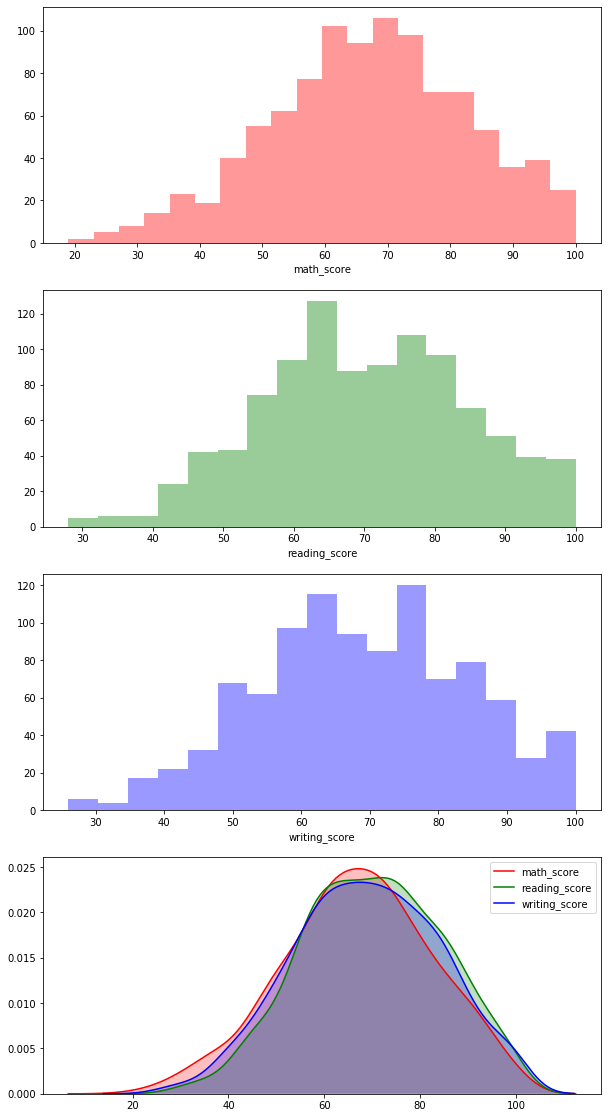

In [17]:
#displot for score variables individually
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
sns.distplot(df.math_score, ax = ax[0], color = 'r', kde = False)
sns.distplot(df.reading_score, ax = ax[1], color = 'g', kde = False)
sns.distplot(df.writing_score, ax = ax[2], color = 'b', kde = False)

# kdeplot for score variables in single plot
sns.kdeplot(df.math_score, ax = ax[3], color = 'r', shade = True)
sns.kdeplot(df.reading_score, ax = ax[3], color = 'g', shade = True)
sns.kdeplot(df.writing_score, ax = ax[3], color = 'b', shade = True)
plt.show()

The plots are almost normal with some outliers.<br>
The score-peak for math_score & writing_score is around 70 with math_score being around 65.<br><be>
### Next up is grade distribution.

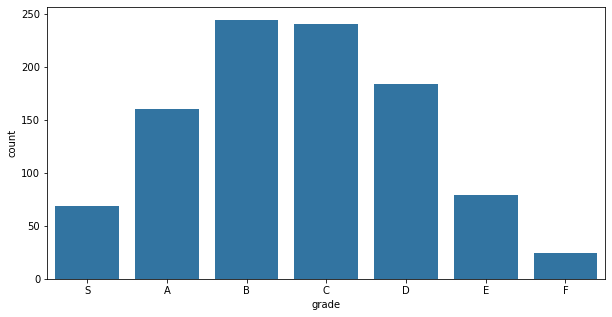

In [18]:
# countplot for grade
plt.figure(figsize = (10, 5))
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'grade', color = base_color)
plt.show()

The count-peak can be seen at B & C grade which means majority of people scored in the range of 80 - 61.<br>
This result was expected, as the same was reflected on the above plot.<br><br>

### Next is the count comparison in gender.

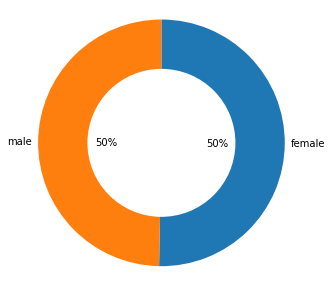

In [19]:
plt.figure(figsize = (10, 5))
sorted_gender = df.gender.value_counts()
plt.pie(sorted_gender, labels = sorted_gender.index, counterclock = False, startangle = 90, autopct = '%1.0f%%', 
        wedgeprops = {'width': 0.4}, pctdistance = 0.45, labeldistance = 1.05)
plt.axis('square')
plt.show()

The ratio for male and female is almost the same with females being a little more in presence, in the dataset.<br><br>

## Next the count comparison in test_preparation_course.

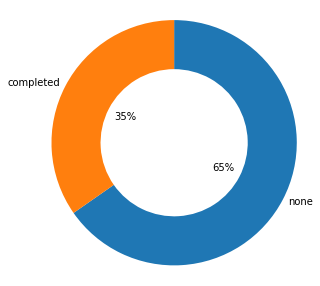

In [20]:
plt.figure(figsize = (10, 5))
sorted_preparation = df.test_preparation_course.value_counts()
plt.pie(sorted_preparation, labels = sorted_preparation.index, counterclock = False, startangle = 90, autopct = '%1.0f%%', 
       wedgeprops = {'width': 0.4}, pctdistance = 0.45, labeldistance = 1.05)
plt.axis('square')
plt.show()

The result deduced that only around 1/3 rd of students have completed the test preparation course.

The score variables were mostly distributed normal with only some outliers which caused the plot to be very slightly left-skewed. No transformations as such was required.

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between numeric features in the data.

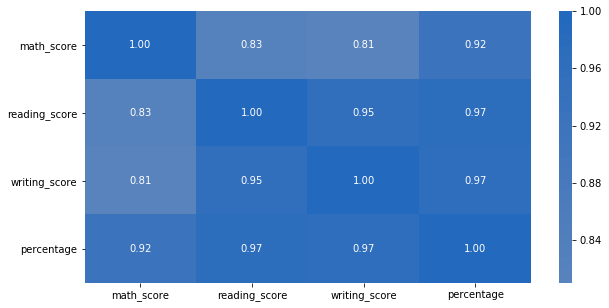

In [21]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', 
            cmap = 'vlag_r', center = 0)
plt.show()

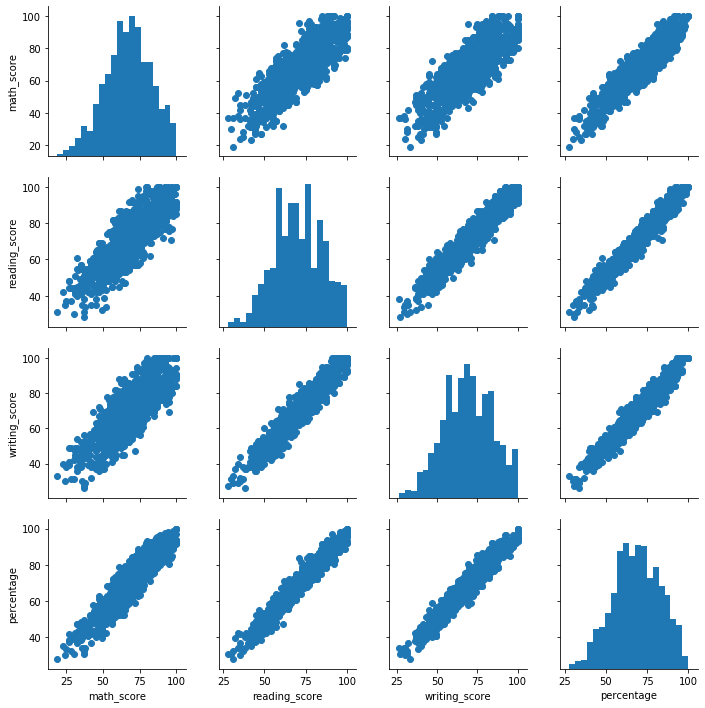

In [22]:
# plot matrix
numeric_vars = ['math_score', 'reading_score', 'writing_score', 'percentage']
g = sns.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.show()

All the score values were found to be highly correlated.
And so was percentage with all the score features because it is an engineered feature and calculated as an average of all the score values.
Moving on to the gender categorical variable.

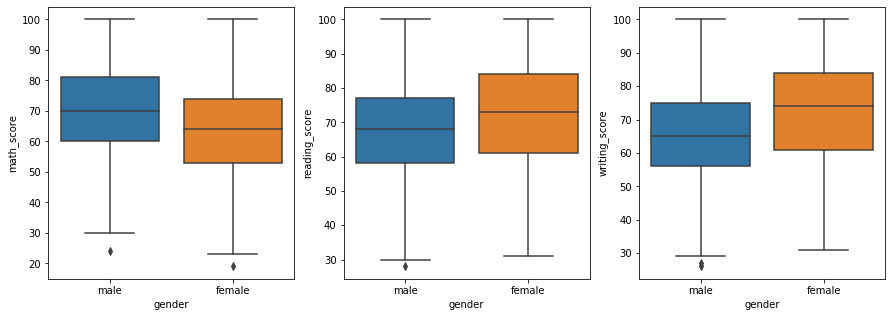

In [23]:
# boxplot for gender vs all the score features
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df, x = 'gender', y = 'math_score')

plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'gender', y = 'reading_score')

plt.subplot(1, 3, 3)
sns.boxplot(data = df, x = 'gender', y = 'writing_score')
plt.show()

Maximum scores for math_score, reading_score and writing_score is 100, both genders inclusive.<br>
Overall, female students performed better than male students in reading_score and writing_score with math_score being the exception where male students performed better than female students.<br>
Outliers for female students below the minimum for math_score, reading_score and writing_score were more compared to male students.

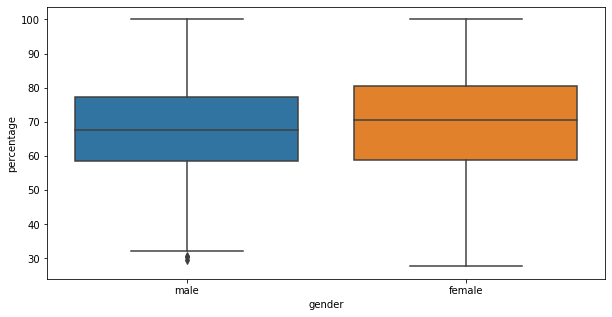

In [24]:
# boxplot for gender vs percentage
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'gender', y = 'percentage')
plt.show()

This shows that overall female students did better than male students.

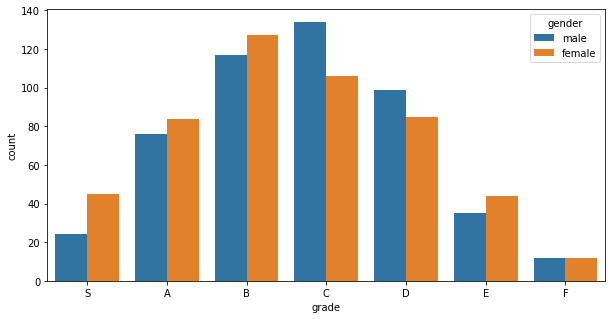

In [25]:
# countplot for grade based seperated by gender
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'grade', hue = 'gender')
plt.show()

Here, female students scored more number of grade S, A & B and male students scored more number grade C, D & E as it was expected from the above plot.<br>
It can be clearly seen that more number of female students failed the exam compared to male students, but this can also be the result of having sligtly more number of female students, compared to male students in the dataset as the difference isn't very drastic.

## Next is test_preparation_course qualitative variable.

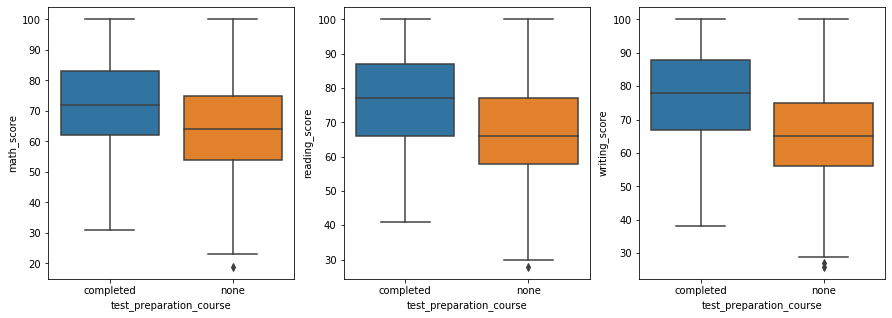

In [26]:
# boxplot for test_preparation_course vs all the score features
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df, x = 'test_preparation_course', y = 'math_score')

plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'test_preparation_course', y = 'reading_score')

plt.subplot(1, 3, 3)
sns.boxplot(data = df, x = 'test_preparation_course', y = 'writing_score')
plt.show()

The effect of test_preparation_course is evident in the scores of students. They have performed better in all the three exams than the students who didn't complete any test preparation.

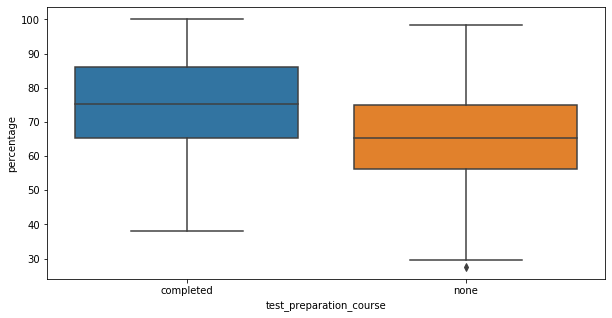

In [27]:
# boxplot for test_preparation_course vs percentage
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'test_preparation_course', y = 'percentage')
plt.show()

Exactly proves the point stated for above plot.

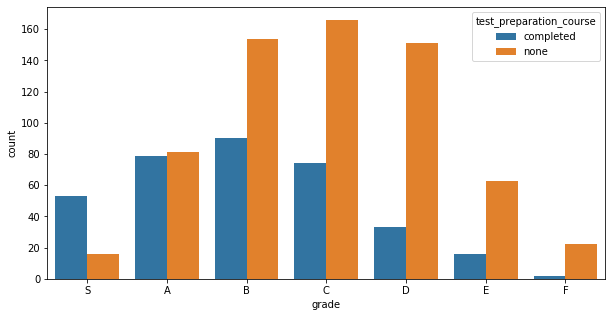

In [28]:
# countplot for grade seperated by test_preparation_course
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'grade', hue = 'test_preparation_course')
plt.show()

Number of students who had none of the test preparation courses were significantly high among the least scorers.
Students who completed test preparation are more having a S grade whereas the students who did none are more having B, C, D, E & F grade.

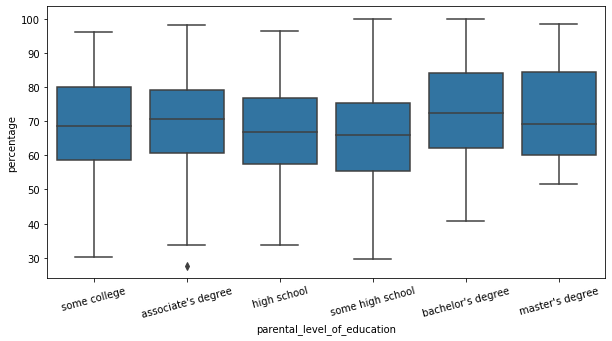

In [29]:
# boxplot for parental_level_of_education vs percentage
plt.figure(figsize = (10, 5))
order = df.parental_level_of_education.value_counts().index
base_color = sns.color_palette()[0]

sns.boxplot(data = df, x = 'parental_level_of_education', y = 'percentage', 
            order = order, color = base_color)
plt.xticks(rotation = 15)
plt.show()

Students with parents who have completed master's degree scored the best.<br>
Stuents with parents who have only completed high school had a comparitively low performance in terms of percentage.

## some relationships observed
All the scores were centainly highly corelated with a linear relationship. And so was percentage with all the score variables. - No transformations were required to prove this.<br>
Female students performed well compared to male students, but interestingly outliers were more for female students in the lowest grade than compared to the male students.<br>
As expected, students who completed the test preparation course, had high percentages as compared to the students who didn't complete the test preparation course.

### Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the two main qualitative feature play into determing the scores of students.

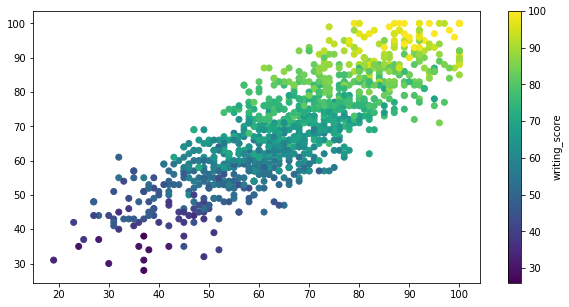

In [30]:
# scatter plot all the scores
plt.figure(figsize = (10, 5))
plt.scatter(data = df, x = 'math_score', y = 'reading_score', c = 'writing_score')
plt.colorbar(label = 'writing_score')
plt.show()

This only proves that all the scores are higly correlated to each other linearly.

[]

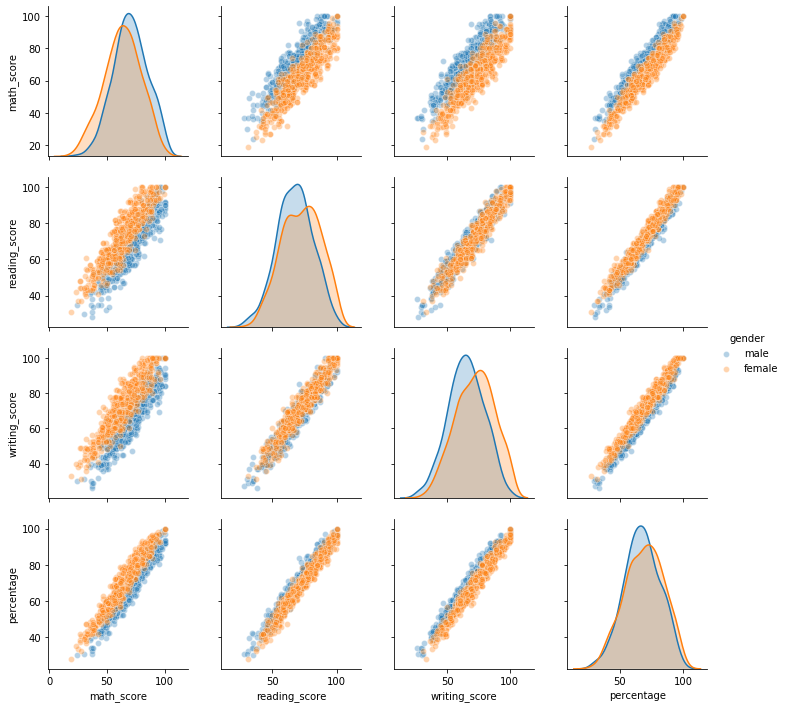

In [31]:
# pairplot for numeric values segregated by gender
sns.pairplot(data = df, hue = 'gender', plot_kws = {'alpha': 1/3})
plt.plot()

As it can be seen here, female students overall have done better than male students.

[]

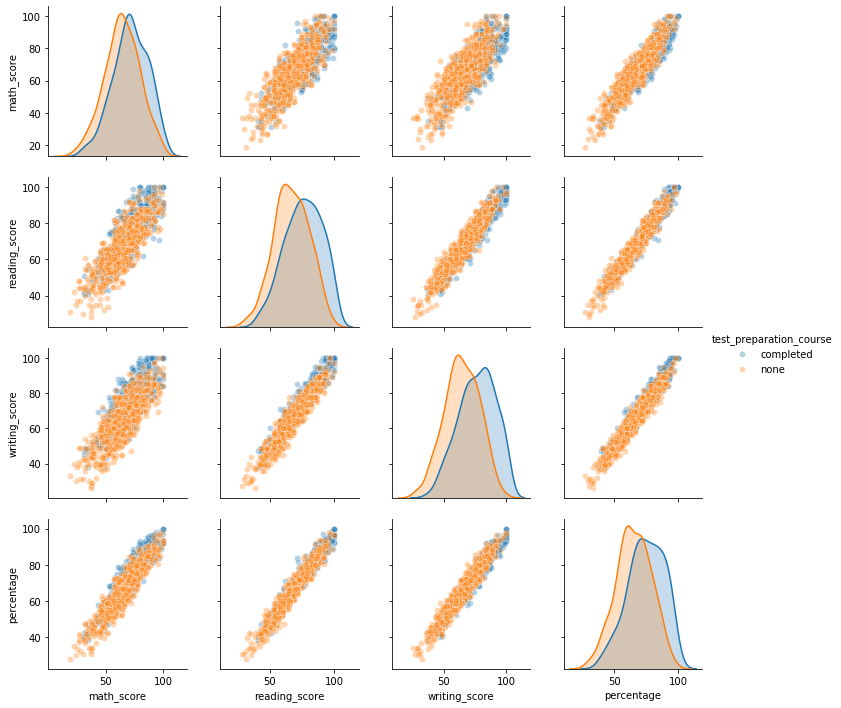

In [32]:
# pairplot for numeric values segregated by test_preparation_course
sns.pairplot(data = df, hue = 'test_preparation_course', plot_kws = {'alpha': 1/3})
plt.plot()

As it can be seen here, students who have completed the test preparation course have done way better than those who haven't.

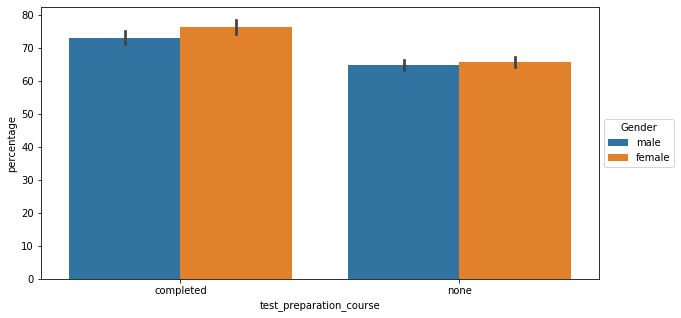

In [33]:
# barplot for both qualitative variable with percentage
plt.figure(figsize = (10, 5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'percentage', hue = 'gender')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = 'Gender')
plt.show()

As it can be seen, students who completed the test_preparation_course scored high percentage.<br>
Female students did well in both the categories of test_prepar̥ation_course.

## final observations
Investigation by plotting all the scores in a single scatter plot and as expected, the correlation is high.<br>
Then I plotted a pairplot for numeric values seperate by gender only to prove that female students overall have done better than male students.<br>
After that, I plotted a pairplot for numeric values segregated by test_preparation_course only to prove that students who have completed the test preparation course have done way better than those who haven't.<br>
Later I concluded with a barplot for both qualitative variable with percentage only to prove what's stated above.